<a href="https://colab.research.google.com/github/shubhj17/Machine_Learning_Algos/blob/master/Logistic_Regression_with_MSE_on_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from google.colab import files
up = files.upload()

Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [0]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random

In [39]:
#Reading data in pandas 

data = pd.read_csv("train.csv")
data = data.dropna(axis = 0).copy()
data.shape

(183, 12)

In [40]:
#Checking Columns

data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [41]:
# Getting some rows of dataset

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [42]:
# Selecting Features

selected_features = data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
selected_features = pd.DataFrame(selected_features)
selected_features.shape

target = data['Survived']
target = np.array(target)
target = np.reshape(target,[len(target),1])
target.shape


(183, 1)

In [43]:
  # Dropping null values

selected_features = selected_features.dropna(axis = 0).copy()
selected_features.shape

(183, 7)

In [0]:
# Replacing values with 0,1

selected_features['Sex'] = selected_features['Sex'].replace(['M','F'],[0,1])
selected_features['Sex'] = selected_features['Sex'].replace(['male','female'],[0,1])


In [0]:
# Replacing Embarked column values with 0,1,2
selected_features['Embarked'] = selected_features['Embarked'].replace(list(set(selected_features['Embarked'])),[0,1,2])
#selected_features = np.array(selected_features)


In [0]:
# Defining Functions 

def sigmoid_function(m,x,c):
  return 1/(1 + np.exp(-(np.dot(m,x.T) + c)))

def cost_function(m,x,c,y):
  return np.mean(((sigmoid_function(m,x,c)-y)**2))

def error(predicted,actual):
    return np.mean((predicted-actual)**2)

def derivative_slope(m,x,c,y):
  temp = -(np.dot(m,x.T) + c) #mx + c 
  a = sigmoid_function(m,x,c)-y.T #yp-ya
  b = (1+np.exp(temp))**-2 #(1+e^-x)^-2
  c = np.exp(temp) #e^-x
  d = 2*np.mean(np.multiply(a*b*c,x.T),axis=1)
  d = np.array(d)
  d = d.reshape(1,len(d))
  return d 
  
def intercept(m,x,c,y):
    a=np.exp(-np.dot(m,x.T)+c)#e^-x 
    b=sigmoid_function(m,x,c)**2#(1/1+e^-x)**2 
    c=error(sigmoid_function(m,x,c),y)
    d=2*np.mean(a*b*c)
    return d
  
#def accuracy()

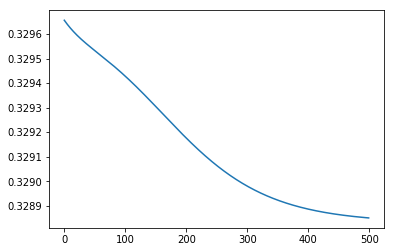

In [78]:
# Training our data

m = np.random.randn(1,7)
c = random.random()
alpha = 0.001
cost = []
result = []

for i in range (0,500):
  m = m - alpha * derivative_slope(m,selected_features,c,target)
  c = c - alpha * intercept(m,selected_features,c,target)
  cost.append(cost_function(m,selected_features,c,target))
  result.append(sigmoid_function(m,selected_features,c))
  

plt.plot(cost)
plt.show()
